#### Gradient Boosting Classifier

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, StratifiedKFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler


In [3]:
# Load dataset
df = pd.read_csv('diabetes.csv')
df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# Features and target
X = df.drop('class', axis=1)
y = df['class']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled


array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [5]:
# Perform train, test split on the dataset
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.8, random_state = 42)

In [6]:
# Instantiate the model and define the parameters
gbc = GradientBoostingClassifier(random_state=42)

# Set up KFold cross-validation
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# Grid search with cross-validation
grid_search = GridSearchCV(estimator=gbc,
                           param_grid=param_grid,
                           cv=kfold,
                           scoring='recall',
                           n_jobs=-1,
                           verbose=1)


In [7]:
# Fit the model
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Recall:", grid_search.best_score_)


Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.6257575757575757


In [1]:
# Evaluate on test data using best estimator
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#### Identify feature importance scores using XGBClassifier

In [17]:
best_model.feature_importances_

array([0.08968868, 0.26073071, 0.05878982, 0.05376621, 0.08816734,
       0.16270506, 0.17732721, 0.10882496])

In [19]:
features = pd.DataFrame(best_model.feature_importances_, index = df.iloc[:,:-1].columns, columns=["Importances"])
df1= features.sort_values(by = "Importances")

<Axes: xlabel='None', ylabel='Importances'>

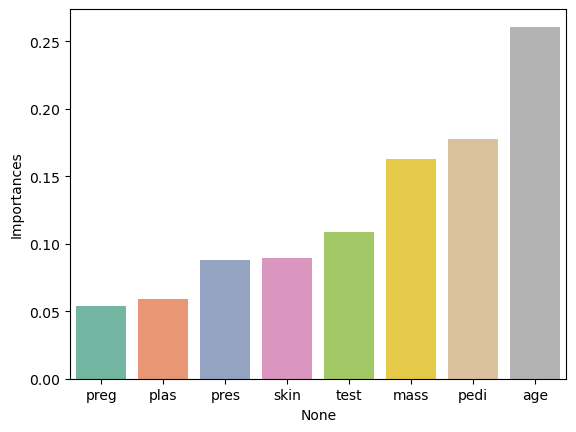

In [21]:
import seaborn as sns
sns.barplot(data = df1, x= features.index, y= "Importances", hue = features.index,palette = "Set2")